In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/trainset.csv")
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [3]:
train_data_array=np.array((train_data.iloc[:,1:2]).values)

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train_data_array=sc.fit_transform(train_data_array)

In [5]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(train_data_array[i-60:i,0])
  y_train_array.append(train_data_array[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [6]:
length = 60
n_features = 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
model=Sequential([
    SimpleRNN(120,input_shape=(length,n_features)),
    Dense(1)
])
model.compile(optimizer="adam",loss='mse')

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=50)

In [8]:
model.fit(X_train1,y_train,epochs=500,batch_size=32,verbose=2,callbacks=[early_stop])

Epoch 1/500
38/38 - 4s - loss: 0.0166 - 4s/epoch - 92ms/step
Epoch 2/500
38/38 - 1s - loss: 8.3797e-04 - 1s/epoch - 33ms/step
Epoch 3/500
38/38 - 1s - loss: 6.7723e-04 - 1s/epoch - 32ms/step
Epoch 4/500
38/38 - 1s - loss: 5.5877e-04 - 1s/epoch - 27ms/step
Epoch 5/500
38/38 - 1s - loss: 5.3066e-04 - 1s/epoch - 30ms/step
Epoch 6/500
38/38 - 1s - loss: 4.9825e-04 - 1s/epoch - 27ms/step
Epoch 7/500
38/38 - 1s - loss: 4.5879e-04 - 1s/epoch - 28ms/step
Epoch 8/500
38/38 - 1s - loss: 5.2134e-04 - 1s/epoch - 32ms/step
Epoch 9/500
38/38 - 1s - loss: 5.0471e-04 - 1s/epoch - 30ms/step
Epoch 10/500
38/38 - 1s - loss: 5.2215e-04 - 1s/epoch - 29ms/step
Epoch 11/500
38/38 - 1s - loss: 4.0903e-04 - 1s/epoch - 29ms/step
Epoch 12/500
38/38 - 1s - loss: 3.5260e-04 - 1s/epoch - 35ms/step
Epoch 13/500
38/38 - 1s - loss: 3.3926e-04 - 854ms/epoch - 22ms/step
Epoch 14/500
38/38 - 1s - loss: 3.3278e-04 - 648ms/epoch - 17ms/step
Epoch 15/500
38/38 - 1s - loss: 3.8472e-04 - 641ms/epoch - 17ms/step
Epoch 16/500
3

In [9]:
test_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/testset.csv")
test_data_array=np.array(test_data.iloc[:,1:2].values)
test_data_array=sc.transform(test_data_array)
X_test_data=[]
X_test_data=list(train_data_array)+list(test_data_array)

In [10]:
X_test=[]
for i in range(60,(len(X_test_data))):
  X_test.append(X_test_data[i-60:i])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [11]:
X_test.shape

(1324, 60, 1)

In [12]:
predicted_stock_price=model.predict(X_test)
predicted_stock_price=MinMaxScaler().fit_transform(predicted_stock_price)

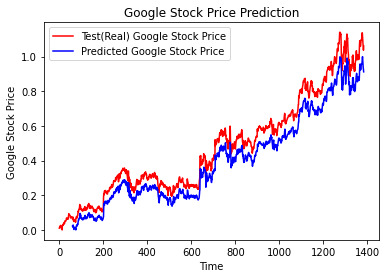

In [14]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0,1384),X_test_data,color='red',label="Test(Real) Google Stock Price")
plt.plot(np.arange(60,1384),predicted_stock_price,color='blue',label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.show()